<a href="https://colab.research.google.com/github/rouagh/DataScience_MLP/blob/master/MLP_demo_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Load 2 features from Iris (petal length and petal width) for visualization purposes
#Train neural network for 3 output flower classes ('Setosa', 'Versicolor', 'Virginica')

from mlxtend.data import iris_data

X, y = iris_data()
X = X[:, [0, 3]]   

# standardize training data
X_std = (X - X.mean(axis=0)) / X.std(axis=0)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
from mlxtend.classifier import MultiLayerPerceptron as MLP
#Multi-layer perceptron classifier with logistic sigmoid activations
#minibatches :Divide the training data into k minibatches for accelerated stochastic gradient descent learning
#epochs: training periode
nn1 = MLP(hidden_layers=[50], 
          l2=0.00, 
          l1=0.0, 
          epochs=150, 
          eta=0.05, 
          momentum=0.1,
          decrease_const=0.0,
          minibatches=1, 
          random_seed=1,
          print_progress=3)
#Learn model from training data
nn1 = nn1.fit(X_std, y)


/usr/local/lib/python3.6/dist-packages/mlxtend/_base/_classifier.py:19: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(y[0], int):
Iteration: 150/150 | Cost 0.06 | Elapsed: 0:00:00 | ETA: 0:00:00

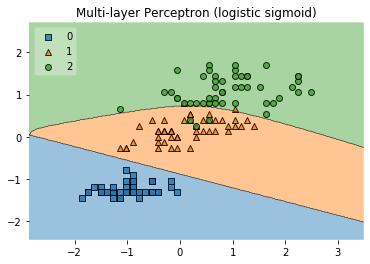

In [24]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

fig = plot_decision_regions(X=X_std, y=y, clf=nn1, legend=2)
plt.title('Multi-layer Perceptron (logistic sigmoid)')
plt.show()

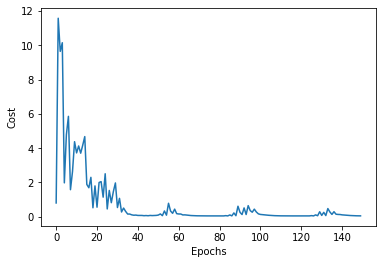

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(len(nn1.cost_)), nn1.cost_)
#plot of the curve Cost= weight and epochs= training period
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

In [25]:
#precision
print('Accuracy: %.2f%%' % (100 * nn1.score(X_std, y)))


Accuracy: 96.67%


/usr/local/lib/python3.6/dist-packages/mlxtend/_base/_classifier.py:19: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(y[0], int):
Iteration: 5/5 | Cost 0.11 | Elapsed: 00:00:00 | ETA: 00:00:00

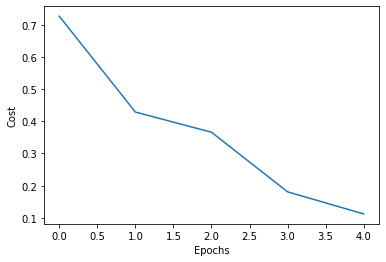

In [27]:
nn2 = MLP(hidden_layers=[50], 
          l2=0.00, 
          l1=0.0, 
          epochs=5, 
          eta=0.005, 
          momentum=0.1,
          decrease_const=0.0,
          minibatches=len(y), 
          random_seed=1,
          print_progress=3)

#nn2.epochs!=nn1.epochs and minibatches

nn2.fit(X_std, y)

plt.plot(range(len(nn2.cost_)), nn2.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

In [12]:
nn2.epochs = 25
nn2 = nn2.fit(X_std, y)

/usr/local/lib/python3.6/dist-packages/mlxtend/_base/_classifier.py:19: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(y[0], int):
Iteration: 25/25 | Cost 0.07 | Elapsed: 0:00:00 | ETA: 0:00:00

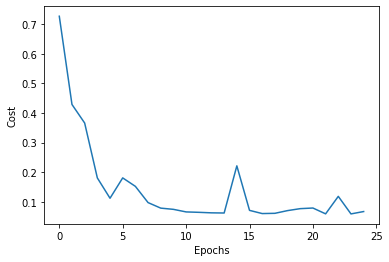

In [13]:
plt.plot(range(len(nn2.cost_)), nn2.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()